Final weights: [0.03723836 0.02448056]
Final bias: -0.30000000000000004


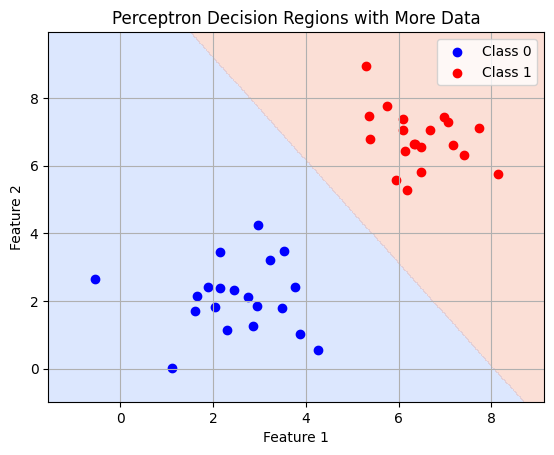

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate more 2D training data
np.random.seed(0)

# Class 0: centered around (2, 2)
class0 = np.random.randn(20, 2) + [2, 2]

# Class 1: centered around (7, 7)
class1 = np.random.randn(20, 2) + [7, 7]

# Combine data and labels
X = np.vstack((class0, class1))
y = np.array([0]*20 + [1]*20)

# Initialize weights and bias
weights = np.zeros(2)
bias = 0
lr = 0.1
epochs = 30

# Activation function
def activation(z):
    return 1 if z >= 0 else 0

# Training loop
for epoch in range(epochs):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        y_pred = activation(z)
        error = y[i] - y_pred
        weights += lr * error * X[i]
        bias += lr * error

# Output final weights and bias
print("Final weights:", weights)
print("Final bias:", bias)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z >= 0, alpha=0.3, cmap='coolwarm')
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='red', label='Class 1')
plt.title("Perceptron Decision Regions with More Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
